<a href="https://colab.research.google.com/github/arshpreetw11/stroke-predictor/blob/main/proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import numpy as np
import pandas as pd

In [195]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [196]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [198]:
df.corr(numeric_only=True)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [199]:
from sklearn.model_selection import train_test_split

In [200]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [201]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

In [202]:

from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
class FeatureEngineer(BaseEstimator,TransformerMixin):
  def __init__(self) :
    pass
  def fit(self, X, y=None):
    return self
  def transform(self,X):
    X=X.copy()
    X['ever_married']=(X['ever_married']=='Yes').astype(int)
    X['bmi_missing']=X['bmi'].isna().astype(int)
    X['age_group']=pd.cut(X['age'],bins=[0,40,50,60,70,120],labels=['<40','40-50','50-60','60-70','70-120'])
    X['high_glucose']=(X['avg_glucose_level']>140).astype(int)
    X['high_bmi']=(X['bmi']>30).astype(int)
    X['smoking']=((X['smoking_status']!='never smoked')).astype(int)
    X['risk_factor']=(X['hypertension']+
                      X['heart_disease']+
                      X['smoking']+X['high_glucose']+X['high_bmi'])
    X['age_glucose_interaction']=X['age']*X['avg_glucose_level']
    return X



In [203]:
fe=FeatureEngineer()
X_train_tnf=fe.fit_transform(X_train)
X_test_tnf=fe.transform(X_test)


In [204]:
X_train_tnf['smoking'].unique()

array([1, 0])

In [205]:
import seaborn as sns

<Axes: xlabel='bmi', ylabel='Density'>

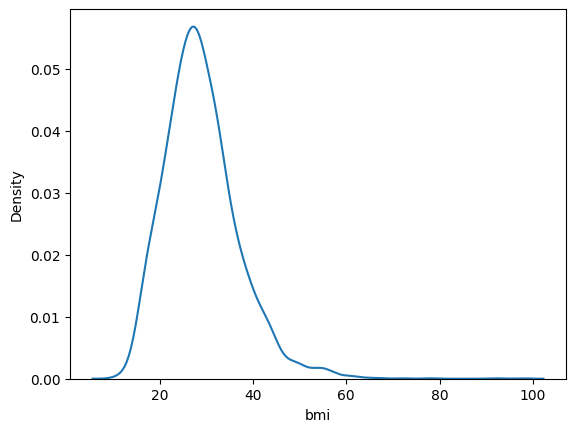

In [206]:
sns.kdeplot(X_train_tnf['bmi'])

<Axes: xlabel='age_glucose_interaction', ylabel='Density'>

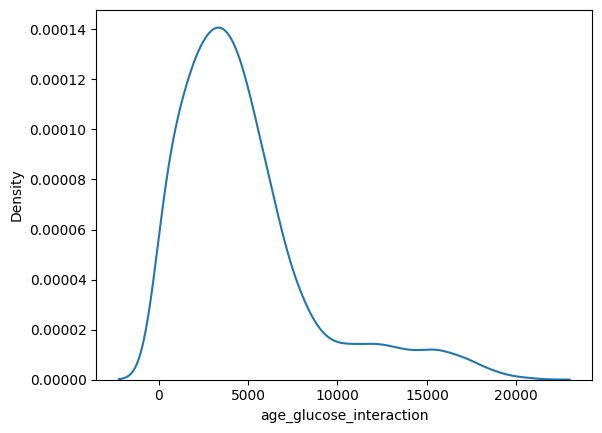

In [207]:
sns.kdeplot(X_train_tnf['age_glucose_interaction'])

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

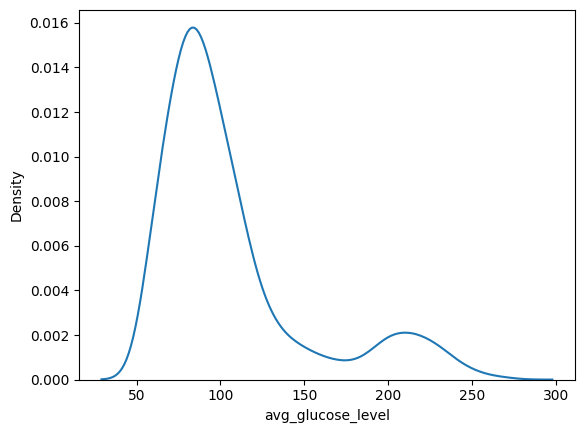

In [208]:
sns.kdeplot(X_train_tnf['avg_glucose_level'])

<Axes: ylabel='age_glucose_interaction'>

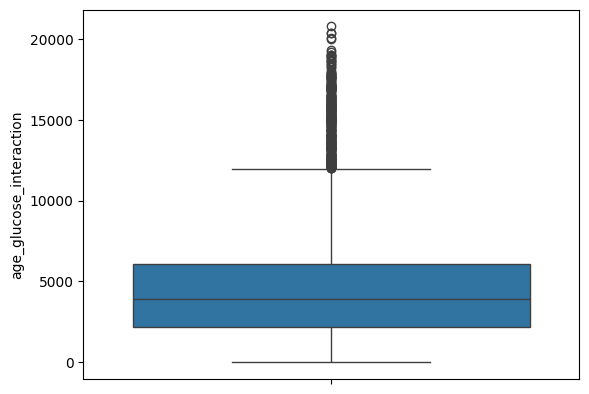

In [209]:
sns.boxplot(X_train_tnf['age_glucose_interaction'])

<Axes: ylabel='age_glucose_interaction'>

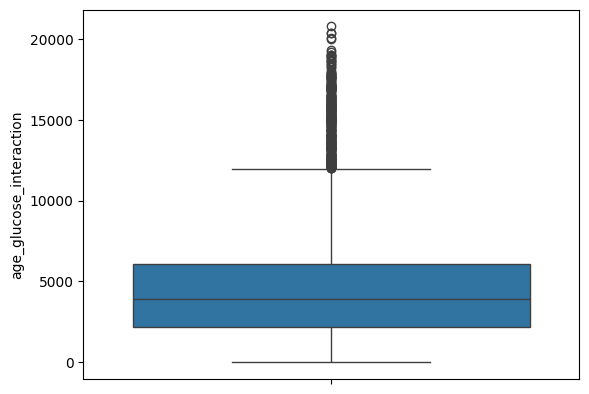

In [210]:
sns.boxplot(X_train_tnf['age_glucose_interaction'])

<Axes: ylabel='avg_glucose_level'>

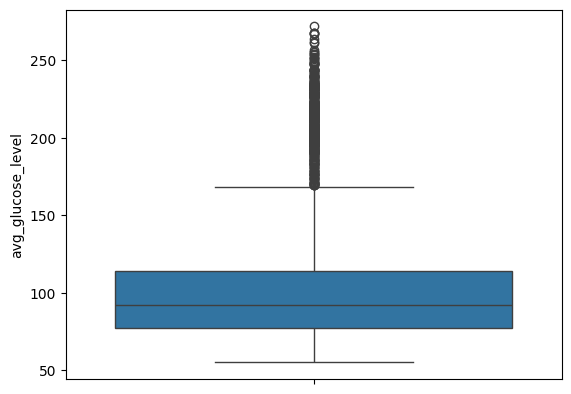

In [211]:
sns.boxplot(X_train_tnf['avg_glucose_level'])

In [212]:
X_train_tnf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,bmi_missing,age_group,high_glucose,high_bmi,smoking,risk_factor,age_glucose_interaction
1260,Male,39.0,0,0,1,Private,Urban,102.77,35.8,smokes,0,<40,0,1,1,2,4008.03
1636,Male,23.0,0,0,1,Private,Urban,115.83,25.3,never smoked,0,<40,0,0,0,0,2664.09
2987,Female,15.0,0,0,0,Private,Urban,76.77,21.7,Unknown,0,<40,0,0,1,1,1151.55
2944,Female,36.0,0,0,1,Private,Rural,103.76,27.1,never smoked,0,<40,0,0,0,0,3735.36
44,Male,60.0,1,0,1,Govt_job,Urban,213.03,20.2,smokes,0,50-60,1,0,1,3,12781.80


In [213]:
y_train.value_counts()

,count
stroke,
0,3645
1,187


In [214]:
outlier_skewness_scaling_cols=['age_glucose_interaction']
scaling_cols=['age','avg_glucose_level','bmi','risk_factor']
one_hot_cols=['gender','age_group','work_type','Residence_type','smoking_status']
sorted_cols=['hypertension','heart_disease','ever_married','bmi_missing','high_glucose','high_bmi','smoking']

In [215]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        self.limits = {}

    def fit(self, X, y=None):
        self._cols = list(self.cols)
        for col in self._cols:
            skew_val = X[col].skew()

            if abs(skew_val) > 0.5:
                q1, q3 = X[col].quantile([0.25, 0.75])
                iqr = q3 - q1
                u = q3 + 1.5 * iqr
                l = q1 - 1.5 * iqr
            else:
                mean = X[col].mean()
                std = X[col].std()
                u = mean + 3 * std
                l = mean - 3 * std

            self.limits[col] = (l, u)
        return self

    def transform(self, X):
        X = X.copy()
        for col in self._cols:
            l, u = self.limits[col]
            X[col] = X[col].clip(lower=l, upper=u)
        return X

In [216]:
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
import numpy as np
import pandas as pd

class SkewnessWrapper(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        self.funcs = {}

    def fit(self, X, y=None):
        self._cols = list(self.cols)
        for col in self._cols:
            skew_val = X[col].skew()

            if abs(skew_val) > 1.5:
                ft = FunctionTransformer(np.log1p, validate=False)
            else:
                ft = PowerTransformer(method='yeo-johnson', standardize=False)

            ft.fit(X[[col]])
            self.funcs[col] = ft
        return self

    def transform(self, X):
        X = X.copy()
        for col in self._cols:
            X[col] = self.funcs[col].transform(X[[col]]).ravel()
        return X

In [222]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [223]:
outlier_skewness_pipeline=Pipeline([
    ('outlier',OutlierWrapper(outlier_skewness_scaling_cols)),
    ('skewness',SkewnessWrapper(outlier_skewness_scaling_cols)),
    ('scaling',StandardScaler())
])
scaling_pipeline=Pipeline([('impute',KNNImputer()),
    ('scaling',StandardScaler())
])
one_hot_pipeline=Pipeline([
    ('one_hot',OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'))
])
sorted_pipeline=Pipeline([
    ('sorted',FunctionTransformer(validate=False))
])


In [224]:
from sklearn.compose import ColumnTransformer
clf=ColumnTransformer([
    ('outlier_skewness',outlier_skewness_pipeline,outlier_skewness_scaling_cols),
    ('scaling',scaling_pipeline,scaling_cols),
    ('one_hot',one_hot_pipeline,one_hot_cols),
    ('sorted',sorted_pipeline,sorted_cols)
    ])

In [227]:
X_train_clf=clf.fit_transform(X_train_tnf)
X_test_clf=clf.transform(X_test_tnf)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [228]:
X_train_clf

array([[ 0.0361222 , -0.17671698, -0.07183193, ...,  0.        ,
         1.        ,  1.        ],
       [-0.43543376, -0.88967069,  0.21699261, ...,  0.        ,
         0.        ,  0.        ],
       [-1.16808046, -1.24614754, -0.64682718, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.64102356, -1.69174361, -0.01853429, ...,  0.        ,
         0.        ,  1.        ],
       [-0.6844201 , -0.3103958 , -1.07099675, ...,  0.        ,
         1.        ,  1.        ],
       [-0.02780414,  0.66991554, -0.89252707, ...,  0.        ,
         0.        ,  1.        ]])

In [229]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [230]:
!pip install optuna

In [231]:
import optuna

In [232]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [233]:
y_train.value_counts()

,count
stroke,
0,3645
1,187


In [234]:
def objective1(trial):
  params={
      'n_estimators':trial.suggest_int('n_estimators',100,1000),
      'max_depth':trial.suggest_int('max_depth',1,20),
      'min_samples_split':trial.suggest_int('min_samples_split',2,10),
      'min_samples_leaf':trial.suggest_int('min_samples_leaf',1,10),
      'max_features':trial.suggest_categorical('max_features',['sqrt','log2',None]),
      'bootstrap':trial.suggest_categorical('bootstrap',[True,False]),
      'ccp_alpha':trial.suggest_float('ccp_alpha',0.0,0.03)
  }
  model=RandomForestClassifier(**params,random_state=42,class_weight='balanced')
  pipeline=Pipeline([('fe',FeatureEngineer()),
      ('clf',clf),('model',model)
  ])
  pipeline.fit(X_train,y_train)
  score=cross_val_score(pipeline,X_train,y_train,cv=3,scoring='recall').mean()
  return score



In [235]:
study=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective1,n_trials=30)

[I 2025-12-17 10:02:57,243] A new study created in memory with name: no-name-31c7c93c-87a0-4ac0-8cdb-85717e2fd97b
[I 2025-12-17 10:03:14,114] Trial 0 finished with value: 0.8498037207714626 and parameters: {'n_estimators': 437, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True, 'ccp_alpha': 0.021242177333881365}. Best is trial 0 with value: 0.8498037207714626.
[I 2025-12-17 10:03:26,740] Trial 1 finished with value: 0.710957501280082 and parameters: {'n_estimators': 118, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': None, 'bootstrap': True, 'ccp_alpha': 0.008736874205941257}. Best is trial 0 with value: 0.8498037207714626.
[I 2025-12-17 10:03:34,418] Trial 2 finished with value: 0.8552654036525004 and parameters: {'n_estimators': 651, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False, 'ccp_alpha': 0.0013935123815999317}. Best is trial 2 with 

In [236]:
from sklearn.model_selection import cross_val_score

In [237]:
study.best_params

{'n_estimators': 585,
 'max_depth': 7,
 'min_samples_split': 6,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'bootstrap': False,
 'ccp_alpha': 0.01894222357503357}

In [238]:
study.best_value

0.8657620754394948

In [239]:
best_params=study.best_params
model=RandomForestClassifier(**best_params,random_state=42,class_weight='balanced')



In [240]:
pipeline=Pipeline([('fe',FeatureEngineer()),
      ('clf',clf),('model',model)
  ])
from sklearn.metrics import classification_report
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80      1216
           1       0.12      0.87      0.21        62

    accuracy                           0.69      1278
   macro avg       0.56      0.77      0.51      1278
weighted avg       0.95      0.69      0.78      1278



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [256]:
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score

# Get probabilities
y_prob = pipeline.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.05, 0.95, 0.01)

results = []

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    results.append({
        "threshold": round(t, 2),
        "recall": recall_score(y_test, y_pred_t),
        "precision": precision_score(y_test, y_pred_t),
        "f1": f1_score(y_test, y_pred_t)
    })

df_thresh = pd.DataFrame(results)

# RULE: recall >= 0.85, then maximize precision
best_threshold_row = (
    df_thresh[df_thresh["recall"] >= 0.85]
    .sort_values("precision", ascending=False)
    .head(1)
)

best_threshold_row

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no

,threshold,recall,precision,f1
48,0.53,0.854839,0.131841,0.228448


In [257]:
y_prob=pipeline.predict_proba(X_test)[:,1]
y_pred=np.where(y_prob>0.53,1,0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1216
           1       0.13      0.85      0.23        62

    accuracy                           0.72      1278
   macro avg       0.56      0.78      0.53      1278
weighted avg       0.95      0.72      0.80      1278



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [258]:
import joblib
joblib.dump(pipeline,'pipeline.pkl')

['pipeline.pkl']

In [259]:
import gradio as gr

In [260]:
final_threshold=0.53

In [276]:
import pandas as pd

FINAL_THRESHOLD = 0.53

def predict_stroke(
    gender,
    age,
    hypertension,
    heart_disease,
    ever_married,
    work_type,
    Residence_type,
    avg_glucose_level,
    bmi,
    smoking_status
):
    try:
        # ---- Build input safely ----
        input_df = pd.DataFrame([{
            "gender": gender,
            "age": age,
            "hypertension": hypertension,
            "heart_disease": heart_disease,
            "ever_married": ever_married,
            "work_type": work_type,
            "Residence_type": Residence_type,
            "avg_glucose_level": avg_glucose_level,
            "bmi": bmi,
            "smoking_status": smoking_status
        }])

        # ---- Basic sanity checks ----
        if input_df.isnull().any().any():
            raise ValueError("Input contains missing values.")

        if age < 0 or age > 120:
            raise ValueError("Age must be between 0 and 120.")

        if avg_glucose_level <= 0:
            raise ValueError("avg_glucose_level must be positive.")

        if bmi is not None and bmi <= 0:
            raise ValueError("BMI must be positive.")

        # ---- Model inference ----
        prob = pipeline.predict_proba(input_df)[0, 1]

        # ---- Risk buckets ----
        if prob < 0.25:
            risk = "LOW Risk"
        elif prob < FINAL_THRESHOLD:
            risk = "MODERATE Risk"
        elif prob < 0.70:
            risk = "HIGH Risk"
        else:
            risk = "EXTREME HIGH Risk"

        return {
            "Risk Category": risk,
            "Stroke Probability": round(float(prob), 3),
            "Decision Threshold": FINAL_THRESHOLD,
            "Clinical Note": (
                "This is a screening model. "
                "High or Extreme High risk should be followed by medical evaluation."
            )
        }

    except KeyError as e:
        return {
            "error": "Feature mismatch error",
            "details": f"Missing or unexpected column: {str(e)}"
        }

    except ValueError as e:
        return {
            "error": "Invalid input value",
            "details": str(e)
        }

    except AttributeError as e:
        return {
            "error": "Model not loaded or incompatible",
            "details": str(e)
        }

    except Exception as e:
        return {
            "error": "Unexpected error during prediction",
            "details": str(e)
        }

In [277]:
interface = gr.Interface(
    fn=predict_stroke,

    inputs=[
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Slider(0, 100, value=50, label="Age"),
        gr.Radio([0, 1], label="Hypertension (0 = No, 1 = Yes)"),
        gr.Radio([0, 1], label="Heart Disease (0 = No, 1 = Yes)"),
        gr.Radio(["Yes", "No"], label="Ever Married"),
        gr.Dropdown(
            ["Private", "Self-employed", "Govt_job", "children", "Never_worked"],
            label="Work Type"
        ),
        gr.Radio(["Urban", "Rural"], label="Residence Type"),
        gr.Slider(50, 300, value=100, label="Average Glucose Level"),
        gr.Slider(10, 60, value=25, label="BMI"),
        gr.Dropdown(
            ["never smoked", "formerly smoked", "smokes", "Unknown"],
            label="Smoking Status"
        )
    ],

    outputs=gr.JSON(label="Prediction Output"),

    title="Stroke Risk Prediction (Healthcare ML)",
    description=(
        "Recall-focused stroke screening model.\n"
        "Threshold tuned to minimize false negatives.\n\n"
        f"Decision Threshold = {FINAL_THRESHOLD}"
    )
)

In [278]:
interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1c01ef4f6fc0712c40.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
